# Grupo

- [irsm](https://github.com/iRSM)
- [mateussj12](https://github.com/mateussj12)
- [rgcardos](https://github.com/rgcardos)
- [rjm227](https://github.com/rjm227)
- [zoddinGC](https://github.com/zoddinGC)

# Introdução

No início de 2020, o mundo foi abruptamente impactado por um evento que desencadearia uma das maiores crises de saúde global da história recente: a pandemia de COVID-19. O vírus SARS-CoV-2, responsável pela doença, espalhou-se rapidamente, levando governos, instituições de saúde e populações ao redor do mundo a uma situação de urgência sem precedentes.

A pandemia de COVID-19 desafiou não apenas a capacidade de resposta dos sistemas de saúde, mas também a compreensão da humanidade sobre o que é possível em termos de prevenção e mitigação de doenças infecciosas. No Brasil, não foi diferente. O país enfrentou uma série de desafios complexos, desde a gestão da saúde pública até as consequências econômicas e sociais decorrentes das medidas de contenção adotadas.

Em Belo Horizonte, capital do estado de Minas Gerais, esse período não foi diferente. A cidade se deparou com a necessidade de tomar medidas rápidas e eficazes para proteger sua população da disseminação do vírus e reduzir o impacto nas vidas e na economia local. Durante os primeiros meses de 2020 até meados de 2021, a cidade enfrentou inúmeros desafios e incertezas.

O período dos dados analisados foi de 16 de março de 2020 até dia 18 de junho de 2022. O principal fator abordado para o comparativo foi a taxa de mortes devido ao Covid pela base de dados disponibilizada pelo site [brasil.io](https://github.com/turicas/covid19-br/blob/master/api.md#boletim) com documentação pelo [github](https://github.com/turicas/covid19-br/blob/master/api.md#boletim).

# Objetivo

O principal objetivo deste trabalho é conduzir uma análise abrangente da situação da cidade de Belo Horizonte, Minas Gerais, durante o período da pandemia de COVID-19, abrangendo o ano de 2020 até meados de 2021. A intenção é compreender como a cidade se comportou ao longo desses meses de crise e investigar as causas subjacentes desse comportamento.

Além disso, buca-se estabelecer comparações significativas entre Belo Horizonte e outras cidades do estado de Minas Gerais, bem como com grandes centros urbanos, para identificar diferenças, semelhanças e possíveis fatores determinantes.

Para alcançar esse objetivo, será explorado os seguintes tópicos:

1. **Imprevisibilidade do Evento (Cisne Negro):** Analisar a natureza imprevisível da pandemia de COVID-19, destacando a complexidade de eventos "cisne negro" e seu impacto nas decisões de saúde pública.

2. **Atraso nos Registros:** Investigar como os atrasos nos registros de casos e óbitos podem influenciar nossa compreensão da propagação da doença e das taxas de mortalidade.

3. **Falta de Imunidade:** Avaliar o papel da imunidade da população no controle da disseminação do vírus e na variação das taxas de mortalidade.

4. **PIB e suas Implicações:** Examinar a correlação entre o Produto Interno Bruto (PIB) e as medidas de controle da pandemia, considerando seu impacto nas cidades em estudo.

Ao detalhar esses objetivos, é possível encontrar uma visão mais abrangente e completa da pesquisa em questão, oferecendo um guia claro sobre os tópicos que serão abordados ao longo do estudo.

# Metodologia

A API do site brasil.io estava indisponível no momento que este trabalho foi realizado. Assim, foi feito o download do arquivo 'caso_full.csv' que encontra-se na pasta '/data' deste documento.

Essas foram estapas para realização do estudo:
- **Importação** de bibliotecas Python relevantes
- **ETL:** Extração, Tratamento e Carregamento dos Dados
- **EDA 1:** Análise Exploratória dos Dados de Belo Horizonte
- **EDA 2:** Análise Exploratória dos Dados de Minas Gerais
- **EDA 3:** Análise Exploratória dos Dados de Minas Gerais por PIB
- **EDA 4:** Análise Exploratória dos Dados de Grandes Cidades

## **Importação** de bibliotecas Python relevantes

In [1]:
# Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets

## **ETL:** Extração, Tratamento e Carregamento dos Dados

In [2]:
# Importar dados
df = pd.read_csv('data/caso_full.csv')

# Mostrar informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853648 entries, 0 to 3853647
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      float64
 12  last_available_deaths                     

In [3]:
# Quantidade de dados
linhas, colunas = df.shape

print(f'Os dados contém {linhas:,} linhas e {colunas} colunas.')

Os dados contém 3,853,648 linhas e 18 colunas.


In [4]:
# Quantidade de nulos por coluna
df.isna().sum()

city                                             20119
city_ibge_code                                   13646
date                                                 0
epidemiological_week                                 0
estimated_population                             13646
estimated_population_2019                        13646
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    29166
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int

In [5]:
# Considerando que os dados nulos representam menos de 1% dos dados,
# os mesmos foram eliminados
df = df.dropna(axis=0)

# Eliminando coluna 'estimated_population_2019' dado que o autor
# dos dados informou que esta coluna encontra-se desatualizada
df = df.drop('estimated_population_2019', axis=1)

In [6]:
# Tratamento dos dados para os tipos corretos como timestamp, int etc.

date_columns = ['date', 'last_available_date']

for date_column in date_columns:
    df[date_column] = pd.to_datetime(df[date_column])

df['date'].dtype

dtype('<M8[ns]')

In [7]:
# Divisão da coluna 'epidemiological_week' para ano e data

df['epidemiological_week'] = df['epidemiological_week'].astype(str)

df['year'] = df['epidemiological_week'].str[:4].astype(int)
df['week'] = df['epidemiological_week'].str[-2:].astype(int)

df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,year,week
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0,2020,12
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0,2020,12
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0,2020,12
6,Rio Branco,1200401.0,2020-03-20,202012,413418.0,False,False,7,1.69320,2020-03-20,0.0,0,4,city,AC,3,0,2020,12
8,Rio Branco,1200401.0,2020-03-21,202012,413418.0,False,False,11,2.66075,2020-03-21,0.0,0,5,city,AC,4,0,2020,12


## Funções Auxiliares

In [8]:
def plot_graph(dataframe:pd.DataFrame, city:str=None):
    """
        Gera e exibe um gráfico de linha mostrando a taxa de mortalidade por semana pelo COVID-19 em um DataFrame.

        Parâmetros:
        dataframe (pd.DataFrame): O DataFrame contendo os dados a serem plotados.
        city (str, opcional): O nome da cidade para incluir no título do gráfico.

        Retorno:
        None
    """

    if city != None:
        city = ' em ' + city

    sns.set(style="whitegrid")
    plt.figure(figsize=(15,6))

    sns.lineplot(data=dataframe, x='week', y='death_rate', hue='year', marker="o", palette='Dark2')

    plt.xlabel('Semana')

    plt.ylabel('Taxa de Mortes')

    plt.title(f'Mortalidade por Semana pelo Covid 19 de 2020 a 2021' + city, loc='left', fontsize=18, fontweight='bold')

    plt.legend(title='Ano')

    plt.show()


def filter_data(city:str, separate_dataframes:bool=True, show_graph:bool=False) -> (pd.DataFrame and pd.DataFrame) or pd.DataFrame:
    """
        Filtra e processa os dados de um DataFrame com base na cidade selecionada e no intervalo de datas.

        Parâmetros:
        city (str): O nome da cidade para a qual os dados serão filtrados.
        separate_dataframes (bool, opcional): Indica se os DataFrames filtrados devem ser retornados separadamente.
        show_graph (bool, opcional): Indica se um gráfico deve ser plotado.

        Retorno:
        (pd.DataFrame and pd.DataFrame) ou pd.DataFrame: Se separate_dataframes for True, retorna dois DataFrames.
        Caso contrário, retorna um único DataFrame processado.
    """

    # Filtro dos dados pela cidade selecionada e pelo intervalo de data
    cutted_df = df.loc[(df.city == city)&(df.date <= pd.to_datetime('2021-06-18'))]

    # Agrupar dados por ano e semana
    cutted_df_per_week = cutted_df.groupby(by=['year', 'week']).agg({'last_available_deaths':'last', 'last_available_confirmed':'last'})
    cutted_df_per_week['last_available_deaths'] = cutted_df_per_week['last_available_deaths'] - cutted_df_per_week['last_available_deaths'].shift(1)
    cutted_df_per_week['last_available_deaths_per_100k'] = (cutted_df_per_week['last_available_deaths'] / cutted_df['estimated_population'].unique()[-1]) * 100_000
    cutted_df_per_week['death_rate'] = (cutted_df_per_week['last_available_deaths'] / cutted_df_per_week['last_available_confirmed']) * 100
    cutted_df_per_week.loc[cutted_df_per_week['death_rate'] < 0, 'death_rate'] = 0
    cutted_df_per_week['city'] = city

    cutted_df_per_week = cutted_df_per_week.fillna(0)

    if show_graph:
        plot_graph(dataframe=cutted_df)

    if separate_dataframes:
        return cutted_df, cutted_df_per_week
    else:
        return cutted_df_per_week

In [9]:
def join_2_cities(city1_dataframe:pd.DataFrame(), city2_dataframe:pd.DataFrame()) -> pd.DataFrame():
    """
        Combina os dados de duas cidades em um único DataFrame.

        Parâmetros:
        city1_dataframe (pd.DataFrame): O DataFrame contendo os dados da primeira cidade.
        city2_dataframe (pd.DataFrame): O DataFrame contendo os dados da segunda cidade.

        Retorno:
        pd.DataFrame: Um único DataFrame que combina os dados de ambas as cidades.
    """

    city1_dataframe = city1_dataframe.reset_index()
    city2_dataframe = city2_dataframe.reset_index()

    return pd.concat([city1_dataframe, city2_dataframe], axis=0)


def graph_compare_cities(dataframe:pd.DataFrame):
    """
        Gera e exibe um gráfico de linha comparando as taxas de mortalidade de diferentes cidades.

        Parâmetros:
        dataframe (pd.DataFrame): O DataFrame contendo os dados a serem plotados.

        Retorno:
        None
    """

    sns.set(style="whitegrid")
    plt.figure(figsize=(15,6))

    sns.lineplot(data=dataframe, x=dataframe.index, y='death_rate', markers='o', hue='city', palette='Dark2')

    plt.xlabel('Semana')
    plt.ylabel('Taxa de Mortes')
    plt.legend(title='Cidade')

    plt.title('Mortalidade por Semana pelo Covid 19 de 2020 a 2021', loc='left', fontsize=18, fontweight='bold')

    plt.show()

# Resultados

## **EDA 1:** Análise Exploratória dos Dados de Belo Horizonte

In [10]:
# Recorte dos dados para a cidade de Belo Horizonte

df_bh, df_bh_per_week = filter_data(city='Belo Horizonte')
df_bh.shape

(460, 19)

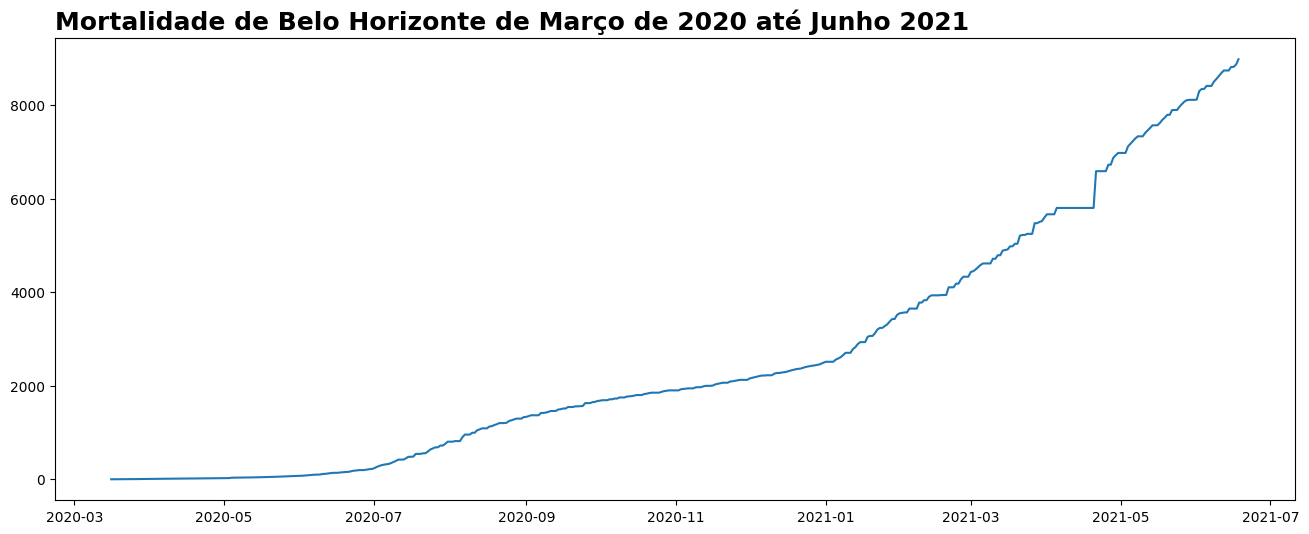

In [11]:
# Este foi o gráfico utilizado para fazer o recorte de tempo
# dado que a partir da data de 18 de Junho de 2021, os dados
# inseridos tiveram muitos gaps que impossibilitam uma análise
# mais apurada

plt.figure(figsize=(16, 6))
plt.plot(df_bh.date, df_bh.last_available_confirmed_per_100k_inhabitants)
plt.title('Mortalidade de Belo Horizonte de Março de 2020 até Junho 2021', fontsize=18, loc='left', fontweight='bold')
plt.show();

In [12]:
# Visualização dos dados por semana
df_bh_per_week

last_available_deaths  last_available_confirmed  \
year week                                                    
2020 12                      0.0                        30   
     13                      0.0                       129   
     14                      3.0                       237   
     15                      3.0                       338   
     16                      2.0                       420   
...                          ...                       ...   
2021 20                    246.0                    199192   
     21                    175.0                    204663   
     22                    112.0                    212178   
     23                    197.0                    220490   
     24                    140.0                    226544   

           last_available_deaths_per_100k  death_rate            city  
year week                                                              
2020 12                          0.000000    0.000000  Belo Horizonte  
     13                          0.000000    0.000000  Belo Horizonte  
     14                          0.118974    1.265823  Belo Horizonte  
     15                          0.118974    0.887574  Belo Horizonte  
     16                          0.079316    0.476190  Belo Horizonte  
...                                   ...         ...             ...  
2021 20                          9.755850    0.123499  Belo Horizonte  
     21                          6.940137    0.085506  Belo Horizonte  
     22                          4.441688    0.052786  Belo Horizonte  
     23                          7.812612    0.089346  Belo Horizonte  
     24                          5.552110    0.061798  Belo Horizonte  

[66 rows x 5 columns]

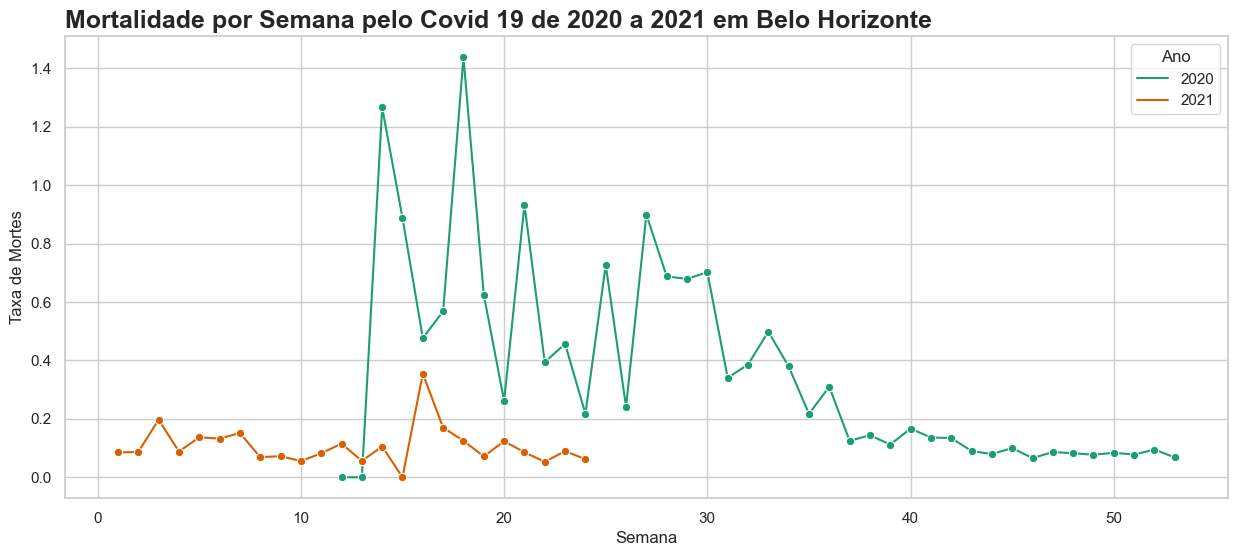

In [13]:
# Visualização da taxa de morte por semana para verificar
# como a cidade controlou o vírus

plot_graph(dataframe=df_bh_per_week.reset_index(), city='Belo Horizonte')

## **EDA 2:** Análise Exploratória dos Dados de Minas Gerais

In [14]:
# Comparativo entre principais cidades de MG
def compare_cities(city:str) -> None:
    cities = join_2_cities(city1_dataframe=df_bh_per_week, city2_dataframe=filter_data(city=city, separate_dataframes=False))
    graph_compare_cities(dataframe=cities)

cities = df.loc[
    (df['city'] != 'Belo Horizonte')&(df['state'] == 'MG')&(df['estimated_population'] >= 150_000),
    'city'
].unique()

interact(compare_cities, city=widgets.Dropdown(options=cities, description='Cidade:'));

interactive(children=(Dropdown(description='Cidade:', options=('Divinópolis', 'Ipatinga', 'Juiz de Fora', 'Set…

Foi comparado as principais cidades de Minas Gerais com população acima de 150 mil habitantes. Verifica-se que algumas cidades demoraram a inserir os dados no sistema e, dessa forma, houve alguns picos na taxa de mortes em alguns períodos devido ao acúmulo de informações. É possível visualizar isso através do gráfico de Belo Horizonte x Divinópolis, por exemplo, onde a segunda cidade demorou aproximadamente 4 semanas para inserir dados e isso ocasionou um pico na taxa de mortes no início. O mesmo ocorre em cidades como Sete Lagoas, Uberlândia, Poços de Caldas, Uberaba, Betim, Contagem, Governador Valadares, Santa Luzia, Ribeirão das Neves, Montes Claros e Ibirité. 

## **EDA 3:** Análise Exploratória dos Dados de Minas Gerais por PIB

In [15]:
# Comparativo do PIB
pib = pd.read_excel('data/pib cidades.xlsx')
pib['Comparativo'] = pib['PIB'] / pib.loc[pib['Cidade'] == 'Belo Horizonte', 'PIB'].values[0]

df_pib_comparativo = pd.DataFrame()

df_ibirite_per_week = filter_data(city='Ibirité', separate_dataframes=False)
df_nova_lima_per_week = filter_data(city='Nova Lima', separate_dataframes=False)

for middle_df in [df_ibirite_per_week, df_nova_lima_per_week, df_bh_per_week]:
    df_pib_comparativo = pd.concat([df_pib_comparativo, middle_df.reset_index()], axis=0)

df_pib_comparativo['Comparativo'] = 0
for city in df_pib_comparativo.city.unique():
    df_pib_comparativo.loc[df_pib_comparativo.city == city, 'Comparativo'] = pib.loc[pib['Cidade'] == city, 'Comparativo'].values[0]

df_pib_comparativo

,year,week,last_available_deaths,last_available_confirmed,last_available_deaths_per_100k,death_rate,city,Comparativo
0,2020,15,0.0,1,0.000000,0.000000,Ibirité,0.372401
1,2020,16,0.0,4,0.000000,0.000000,Ibirité,0.372401
2,2020,17,0.0,5,0.000000,0.000000,Ibirité,0.372401
3,2020,18,0.0,11,0.000000,0.000000,Ibirité,0.372401
4,2020,19,0.0,12,0.000000,0.000000,Ibirité,0.372401
...,...,...,...,...,...,...,...,...
61,2021,20,246.0,199192,9.755850,0.123499,Belo Horizonte,1.000000
62,2021,21,175.0,204663,6.940137,0.085506,Belo Horizonte,1.000000
63,2021,22,112.0,212178,4.441688,0.052786,Belo Horizonte,1.000000
64,2021,23,197.0,220490,7.812612,0.089346,Belo Horizonte,1.000000


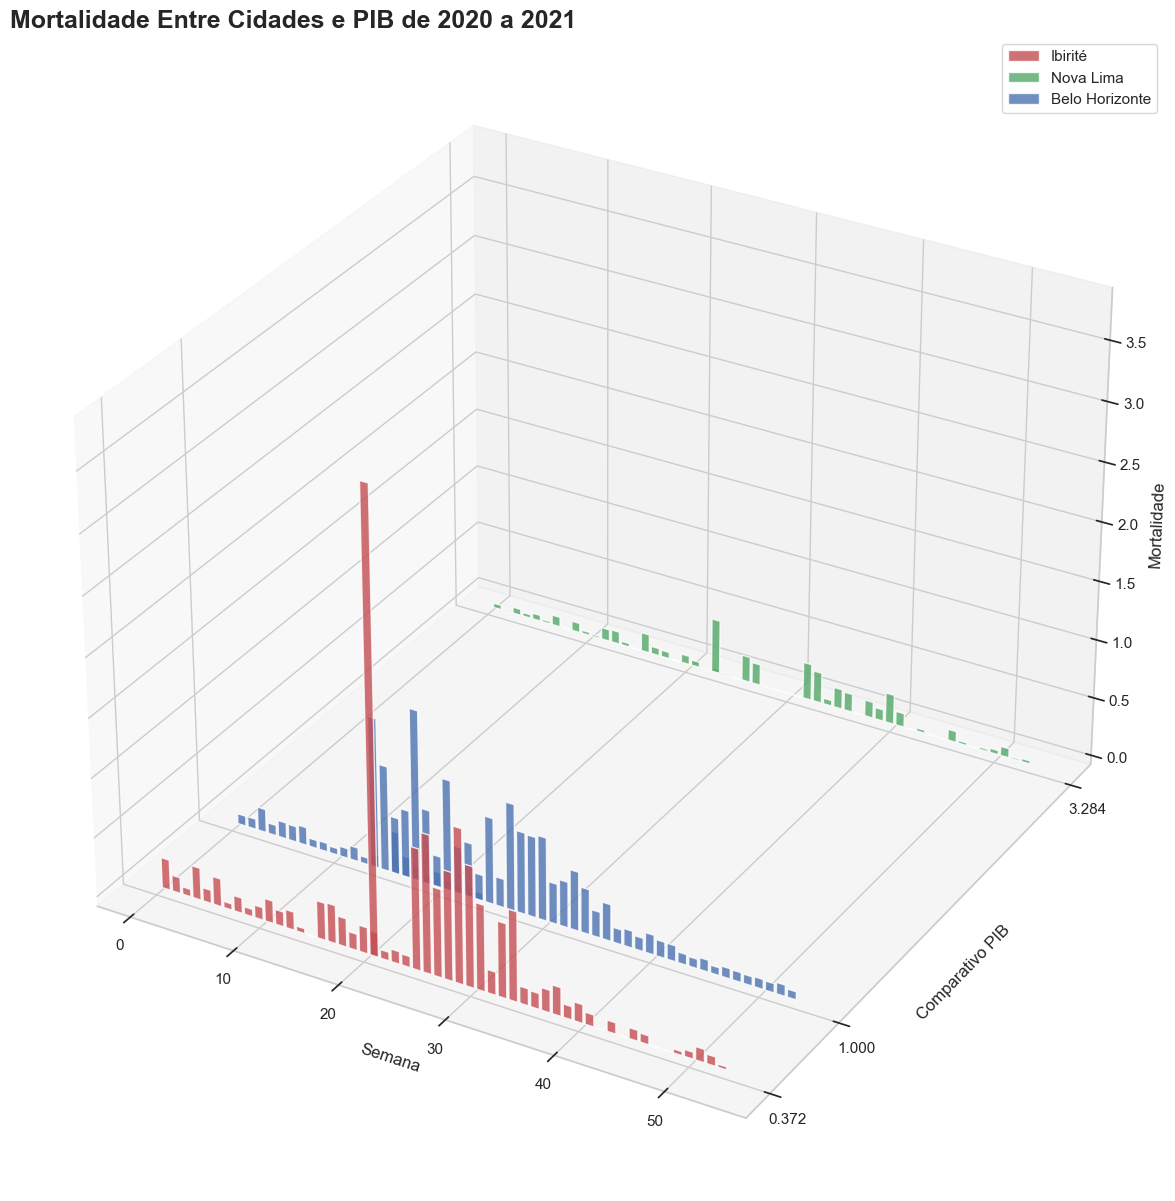

In [16]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b']
yticks = df_pib_comparativo['Comparativo'].unique()
for c, k, city in zip(colors, yticks, df_pib_comparativo['city'].unique()):
    # Generate the random data for the y=k 'layer'.
    xs = df_pib_comparativo.loc[df_pib_comparativo['city'] == city, 'week']
    ys = df_pib_comparativo.loc[df_pib_comparativo['city'] == city, 'death_rate']

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8, label=city)

ax.set_xlabel('Semana')
ax.set_ylabel('Comparativo PIB')
ax.set_zlabel('Mortalidade')

ax.legend()

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.title('Mortalidade Entre Cidades e PIB de 2020 a 2021', fontsize=18, loc='left', fontweight='bold')

plt.show()

In [17]:
df_pib_comparativo.reset_index().drop('city', axis=1)[['death_rate', 'Comparativo']].corr()

,death_rate,Comparativo
death_rate,1.0000,-0.2695
Comparativo,-0.2695,1.0000


## **EDA 4:** Análise Exploratória dos Dados de Grandes Cidades

In [18]:
# Comparativo entre grandes cidades do Sul e Sudeste
capitais = df.loc[
    (df['city'] != 'Belo Horizonte')&((df['state'] == 'SP')|(df['state'] == 'SC')|(df['state'] == 'PR')|(df['state'] == 'RS')|(df['state'] == 'RJ'))&(df['estimated_population'] >= 1_000_000),
    'city'
].unique()

interact(compare_cities, city=widgets.Dropdown(options=capitais, description='Cidade:'));

interactive(children=(Dropdown(description='Cidade:', options=('Curitiba', 'Rio de Janeiro', 'São Gonçalo', 'P…

# Conclusão

Analisando o primeiro gráfico da cidade de Belo Horizonte com outras cidades, percebe-se que houve um início conturbado, pois houve uma alta taxa de mortes em relação aos períodos posteriores. Foram levantados alguns motivos para tal comportamento, dentre eles:

- Imprevisibilidade do evento (cisne negro)
- Atraso dos registros
- Falta de imunidade
- PIB

Com base no estado de Minas Gerais, o primeiro motivo, também chamado de cisne negro por ser um evento catastrófico praticamente imprevisível, gerou um efeito em castata. A falta de conscientização da população quanto às políticas de prevenção e diminuição da contaminação além da falta de coordenação dos poderes públicos geraram uma forte primeira onda. 

Além disso, o atraso dos registros geraram picos artificiais em algumas cidades principalmente no início, como em Patos de Minas, Montes Claros e Betim sendo observado no gráfico 'Mortalidade por Semana pelo Covid 19 de 2020 a 2021'. Assim, o comportamento de algumas cidades da semana 0 até a 30 do ano de 2020 ficou muito distoante uma das outras, porém, a partir da semana 30, observa-se um afuniliamento dos gráficos maneira geral e de modo a ficar muito semelhantes.

Um conceito que explica a curva de mortalidade diminuir com o tempo, é o de imunidade do rebanho. Em resumo, esse conceito é quando um número suficiente de pessoas adquire imunidade e essa imunidade bloqueia a transmissão, eventualmente eliminando o vírus, pois haverá cada vez menos pessoas para ele infectar (BBC, 2022). Dessa forma, a pessoa que não veio a óbito pelo Covid-19, desenvolveu uma resistência ao vírus e diminui sua transmissão.

A última análise sobre o Produto Interno Bruto (PIB) das cidades levantou uma informação relevante. Ao pegar Belo Horizonte como referência, percebe-se que quanto menor o PIB, maior a taxa de mortes e o inverso também é verdadeiro como é possível verificar no gráfico 'Mortalidade Entre Cidades e PIB de 2020 a 2021'. Ao analisar os extremos, Ibirité como menor PIB e Nova Lima como maior PIB, a mortalidade da primeira cidade foi, de maneira geral, maior do que de Belo Horizonte e a segunda cidade menor.

Ao observar o último gráfico 'Mortalidade por Semana pelo Covid 19 de 2020 a 2021' do comparativo entre as cidades do Sul e Sudeste acima de 1 milhão de habitantes, as cidades do estado do Rio de Janeiro e São Paulo junto à sua região metropolitana tiveram uma mortalidade muito superior a Belo Horizonte até a semana 18. "É um somatório de má gestão com uma população que não é educada, que não é treinada para cumprir recomendações" (UOL, 2021).

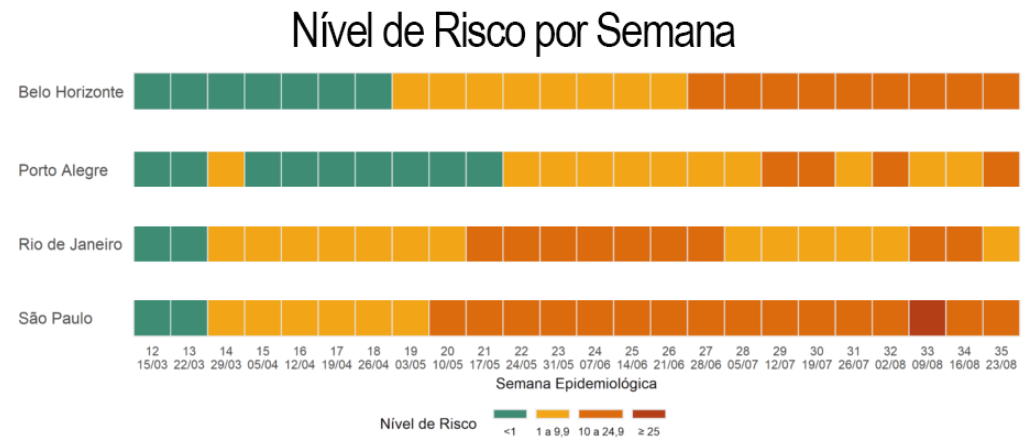

Fonte: Rede de Políticas Públicas & Sociedade, 2020 (adptado)

Já a Porto Alegre teve uma taxa de mortes muito similar a Belo Horizonte e inferior às cidades de São Paulo e Rio de Janeiro. Concatenando a informação do gráfico 'Nível de Risco por Semana' e mortalidade, nota-se que as políticas de _lockdown_ muito restritas não obtiveram êxito em conter o avanço da transmissão, e consequentemente mortalidade, do Covid 19.